In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r'E:\Data Scientist\taitanic_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# step 1: Understand the data
# Step 2: For understandng represtnt data in proper format
# Step 3: Use matplotlib  for Graph to visualize data
# Step 4: Clean data(here our data is already cleaned but still we checking is any null valye or noti)
# Step 5: build model

In [6]:
df.groupby(df['Survived']).mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [ ]:
# As per my understanding Name, PassengerID, Ticket, Fare, Cabin, Embarked, Parch, SibSP (Parch: Parent-Child, SibSP: Sibling spouns //I Google this) This are not importent for prediction  
# For prediction we requires Sex, Age(Helth/Stamina), pclass(If class deck is upper lower)

In [9]:
df1=df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis='columns')
df1.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [11]:
df1.isna().values.sum()

177

In [12]:
df1.dropna()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
885,0,3,female,39.0
886,0,2,male,27.0
887,1,1,female,19.0
889,1,1,male,26.0


In [24]:
df1.isna().values.sum()

0

In [23]:
df1.dropna(inplace=True, axis=0)
df1

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
885,0,3,female,39.0
886,0,2,male,27.0
887,1,1,female,19.0
889,1,1,male,26.0


In [25]:
df1.isna().values.sum()

0

In [27]:
df1.groupby(df1.Sex).mean()

,Survived,Pclass,Age
Sex,,,
female,0.754789,2.065134,27.915709
male,0.205298,2.335541,30.726645


In [ ]:
#I have dought about servivel rate directly connected to age

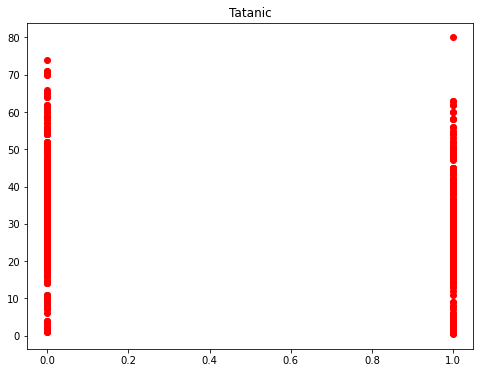

In [46]:
g=plt.figure(figsize=(8,6))

g=plt.subplot(title='Tatanic')
g.scatter(df['Survived'],df['Age'],color='red')

In [ ]:
#its not understanding properly so we elaborate it

In [53]:
df2=df1[df1.Survived==1]
df3=df1[df1.Survived==0]
df2.head()

,Survived,Pclass,Sex,Age
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
8,1,3,female,27.0
9,1,2,female,14.0


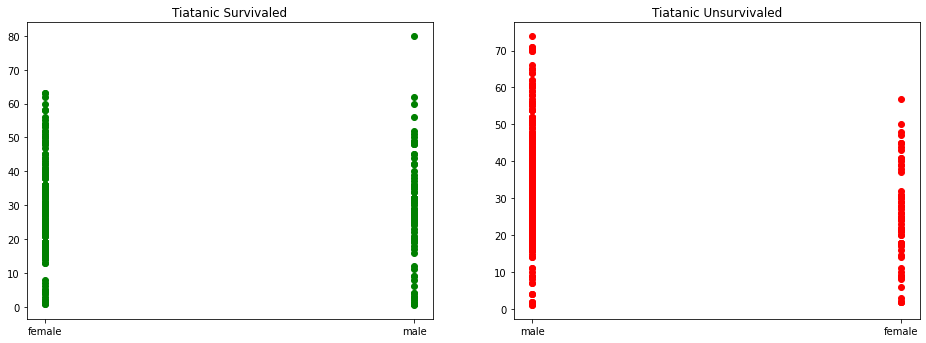

In [59]:
import matplotlib.gridspec as grd

fig=plt.figure(figsize=(16,12))
g=grd.GridSpec(2,2)

g1=plt.subplot(g[0,:1], title="Tiatanic Survivaled")
#g1=plt.subplot(title='Tatanic')
g1.scatter(df2['Sex'],df2['Age'],color='green')

g2=plt.subplot(g[0,1:], title="Tiatanic Unsurvivaled")
#g1=plt.subplot(title='Tatanic')
g2.scatter(df3['Sex'],df3['Age'],color='red')

In [ ]:
#In above graph we can see Death rate of Male is more than femail
#Lets check

In [79]:
Unservived_f=df3[df3.Sex=='female'].count()
Unservived_m=df3[df3.Sex=='male'].count()
#df3[df3.Sex=='female'].count()
print("Unservived Male : "+str(Unservived_m)+"\n ------------------------------------- \n"+"Unservived Female : "+str(Unservived_f))

Unservived Male : Survived    360
Pclass      360
Sex         360
Age         360
dtype: int64
 ------------------------------------- 
Unservived Female : Survived    64
Pclass      64
Sex         64
Age         64
dtype: int64


In [ ]:
#Here we can see 360 male are unservived...Poor male

In [78]:
Servived_f=df2[df2.Sex=='female'].count()
Servived_m=df2[df2.Sex=='male'].count()
#df3[df3.Sex=='female'].count()
print("Servived Male : "+str(Servived_m)+"\n ------------------------------------- \n"+"Servived Female : "+str(Servived_f))

Servived Male : Survived    93
Pclass      93
Sex         93
Age         93
dtype: int64
 ------------------------------------- 
Servived Female : Survived    197
Pclass      197
Sex         197
Age         197
dtype: int64


In [ ]:
#Here we can see Only 93 male are survived

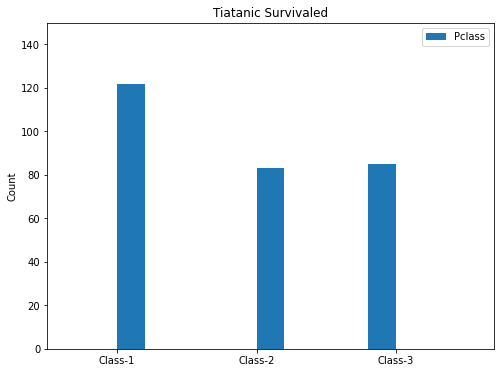

In [120]:
fig=plt.figure(figsize=(8,6))

g1=plt.subplot(title="Tiatanic Survivaled")
g1.hist(df2.Pclass,label='Pclass')
g1.set_xticks([1,2,3])
g1.set_xticklabels(['Class-1', 'Class-2', 'Class-3'])
g1.set(ylabel='Count',xlim=(0.5, 3.7), ylim=(0,150))
g1.legend()

In [ ]:
#AS you can see class 1 have higher servicer rate than other 2 

In [ ]:
#Now we ready to build model

In [121]:
df1.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [ ]:
#We have Sex coloumn text data we have to convert that into numerical

In [122]:
dummies=pd.get_dummies(df1.Sex)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [132]:
df1['male']=dummies.male

In [146]:
df4=df1.drop(['Sex'],axis='columns')
y=df4.Survived
x=df4.drop(['Survived'], axis='columns')
x

,Pclass,Age,male
0,3,22.0,1
1,1,38.0,0
2,3,26.0,0
3,1,35.0,0
4,3,35.0,1
...,...,...,...
885,3,39.0,0
886,2,27.0,1
887,1,19.0,0
889,1,26.0,1


In [163]:
#Now we use diffrent alsorithums for classifications
#Logistic ,RandomForest, SVM , Decision 

In [150]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [153]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [154]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
get_score(lr_model,x_train, x_test, y_train, y_test)

0.7902097902097902

In [159]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
get_score(rf_model,x_train, x_test, y_train, y_test)

0.8111888111888111

In [160]:
from sklearn.svm import SVC
svc_model=SVC()
get_score(svc_model,x_train, x_test, y_train, y_test)

0.6363636363636364

In [161]:
from sklearn.tree import DecisionTreeClassifier
t_model=DecisionTreeClassifier()
get_score(t_model,x_train, x_test, y_train, y_test)

0.8111888111888111

In [162]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=10)
get_score(knn_model,x_train, x_test, y_train, y_test)

0.7832167832167832

In [172]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score


In [175]:
def find_best_model_using_gridsearch(x,y):
    algo = {
        
        'svm': {
            
            'model': svm.SVC(gamma='auto'),
            'params' : {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }  
        },
        'random_forest': {
            'model': RandomForestClassifier(),
            'params' : {
                'n_estimators': [1,5,10]
            }
        },
        'logistic_regression' : {
            'model': LogisticRegression(solver='liblinear',multi_class='auto'),
            'params': {
                'C': [1,5,10]
            }
        },
        'Decision_Tree': {
            'model': DecisionTreeClassifier(),
            'params' : {
            
            }  
        },
        'KNN': {
            'model': KNeighborsClassifier(),
            'params' : {
            
            }  
        },
    }
    
    scores=[]
    
    cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
    
    for algo_name, config in algo.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [176]:
find_best_model_using_gridsearch(x,y)

,model,best_score,best_params
0,svm,0.801865,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.815851,{'n_estimators': 10}
2,logistic_regression,0.818182,{'C': 5}
3,Decision_Tree,0.813520,{}
4,KNN,0.734266,{}


In [ ]:
# # Summary--------------------------------------------------------------------------------------------

In [ ]:
Logical Regression having highest score